In [1]:
# Libraries used
using DataFrames;
using CSV;
using StatsPlots;
using Plots;
using Statistics;
include("utils/visualizations.jl");

# Load dataset 

In [2]:
dataset = CSV.read("datasets/support2.csv", DataFrame, delim = ',');
dataset = select(dataset, Not("id"))
numRows, numCols = size(dataset)

println("Number of instances: ", numRows)
println("Number of features: ", numCols)

Number of instances: 9105
Number of features: 47


# Descriptive analysis

Based on the description of the dataset and the previous section we can divide the information in three classes:

- **Categorical**: These variables are non-continuos and usually represents different categories, for example, sex of the patient (`sex`).

- **Ordinal**: These variables are similar to the numerical ones, but in this case there are not continuous as they represent an order of importance between the categories, for example, the index of disability of the patient (`sfdm2`).

- **Numerical**: These variables are continuos, usually representing a measure, for example, the charges of the patient to the hospital (`charges`). 

In [3]:
# Craft new target variable
dataset[:,"hospdeath"] = dataset[:,"death"] + dataset[:,"hospdead"] 

# Names 
targetName = ["death", "hospdead", "hospdeath"];
ordNames = ["edu", "income", "sfdm2", "ca", "adlp", "adls", "adlsc"];
catNames = ["sex", "dzgroup", "dzclass", "race", "dnr", "dementia", "diabetes"];
numNames = num_feats = names(select(dataset, Not(ordNames, targetName, catNames)), Union{Missing, Number});

println("Target name: ", targetName);
println();
println("Ordinal features (", length(ordNames), "): ", ordNames);
println("Numerical features (", length(numNames), "): ", numNames);
println("Categorical features (", length(catNames), "): ", catNames);

# Partition by data type to perform preprocessing
targetDataset = select(dataset, targetName);
catDataset = select(dataset, catNames);
numDataset = select(dataset, Not(targetName, catNames));

Target name: ["death", "hospdead", "hospdeath"]

Ordinal features (7): ["edu", "income", "sfdm2", "ca", "adlp", "adls", "adlsc"]
Numerical features (31): ["age", "slos", "d.time", "num.co", "scoma", "charges", "totcst", "totmcst", "avtisst", "sps", "aps", "surv2m", "surv6m", "hday", "prg2m", "prg6m", "dnrday", "meanbp", "wblc", "hrt", "resp", "temp", "pafi", "alb", "bili", "crea", "sod", "ph", "glucose", "bun", "urine"]
Categorical features (7): ["sex", "dzgroup", "dzclass", "race", "dnr", "dementia", "diabetes"]


In [ ]:
println("Descriptive analysis of the target: ")
summaryTarget = describe(targetDataset);
show(summaryTarget[:, ["variable", "nmissing", "eltype"]], allrows=true, allcols=true);

Descriptive analysis of the target: 
3×4 DataFrame
 Row │ variable   nmissing  eltype    mean     
     │ Symbol     Int64     DataType  Float64  
─────┼─────────────────────────────────────────
   1 │ death             0  Int64     0.681054
   2 │ hospdead          0  Int64     0.259198
   3 │ hospdeath         0  Int64     0.940253

In [5]:
println("Descriptive analysis of the numerical inputs: ")
summaryNum = describe(numDataset);
show(summaryNum[:,["variable", "nmissing", "eltype", "min", "max", "mean"]], allrows=true, allcols=true);

Descriptive analysis of the numerical inputs: 
38×6 DataFrame
 Row │ variable  nmissing  eltype                    min               max                  mean     
     │ Symbol    Int64     Type                      Any               Any                  Union…   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────
   1 │ age              0  Float64                   18.042            101.848              62.6508
   2 │ slos             0  Int64                     3                 343                  17.863
   3 │ d.time           0  Int64                     3                 2029                 478.45
   4 │ num.co           0  Int64                     0                 9                    1.86864
   5 │ edu           1634  Union{Missing, Int64}     0                 31                   11.7477
   6 │ income        2982  Union{Missing, String15}  $11-$25k          under $11k                    
   7 │ scoma            1  Union

In [6]:
println("Descriptive analysis of the categorical: ")
summaryCat = describe(catDataset);
show(summaryCat[:, ["variable", "nmissing", "eltype", "min", "max"]], allrows=true, allcols=true);

Descriptive analysis of the categorical: 
7×5 DataFrame
 Row │ variable  nmissing  eltype                    min                max          
     │ Symbol    Int64     Type                      Any                Any          
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │ sex              0  String7                   female             male
   2 │ dzgroup          0  String31                  ARF/MOSF w/Sepsis  MOSF w/Malig
   3 │ dzclass          0  String31                  ARF/MOSF           Coma
   4 │ race            42  Union{Missing, String15}  asian              white
   5 │ dnr             30  Union{Missing, String15}  dnr after sadm     no dnr
   6 │ dementia         0  Int64                     0                  1
   7 │ diabetes         0  Int64                     0                  1

Based on the previous analysis we spot some problems with the features:

- **Ordinal features**:
    - `income`, `sfdm2` and `ca` are not correctly encoded. As this variables represent importance levels, they should be encoded as integers ordered in ascendant by their import

- **Categorical**:
    - `sex`, `dzgroup`, `dzclass`, `race`, `ca`, `dnr` are encoded as strings, so they should be one-hot encoded.

- **Numerical**: 
    - Standarization should be performed to scale data, min-max wont work ok since our data could contain outliers since we are treating terminal ill patients.

# Visualizations

- Are classes unbalanced?

In [ ]:
pie_feature(dataset, :death, ["Survived", "Died"], "Proportion of deaths")

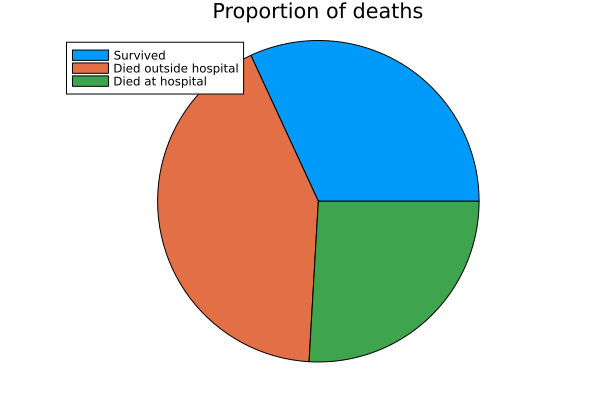

In [ ]:
pie_feature(dataset, :hospdeath, ["Survived", "Died outside hospital", "Died at hospital"],
            "Proportion of deaths at hospital")

- Does the death depend on the gender of the patient?

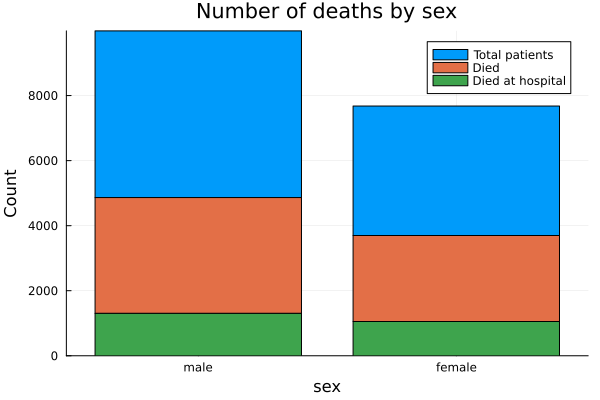

In [8]:
plotCountDeaths(dataset, :sex, ["Total patients" "Died" "Died at hospital"], 
            "Number of deaths by sex")

- Does the death depend on the income of the patient?

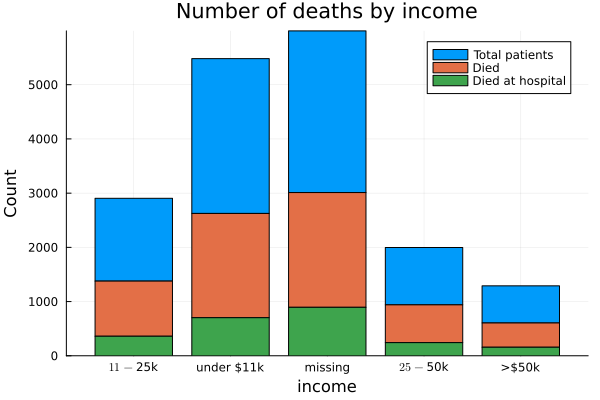

In [9]:
plotCountDeaths(dataset, :income, ["Total patients" "Died" "Died at hospital"], 
            "Number of deaths by income")